In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

# 1. Resampling

### Dataset: Shampoo-Sales

In [3]:
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

In [18]:
df = pd.read_csv('./sales-of-shampoo-over-a-three-ye.csv', index_col=0, parse_dates=[0])

In [19]:
df = df[:-1]

In [24]:
df = df.reset_index()

In [28]:
df['Month'] = df['Month'].apply(lambda x: parser(x))

In [32]:
df.index = df['Month']
del df['Month']

In [33]:
df.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


### upsample

In [34]:
# Day로 Resample 1일에 모두 몰아줌
unsampled = df.resample('D').mean()

In [36]:
unsampled.head(32)

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
1901-01-06,NaN
1901-01-07,NaN
1901-01-08,NaN
1901-01-09,NaN


- interpolation: method - linear 하게 채워진다.

In [37]:
interpolated = unsampled.interpolate(method='linear')
print(interpolated.head())

            Sales of shampoo over a three year period
Month                                                
1901-01-01                                 266.000000
1901-01-02                                 262.125806
1901-01-03                                 258.251613
1901-01-04                                 254.377419
1901-01-05                                 250.503226


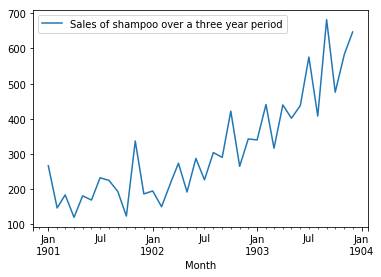

In [42]:
interpolated.plot()

- interpolation: method - spline 하게 채워진다.

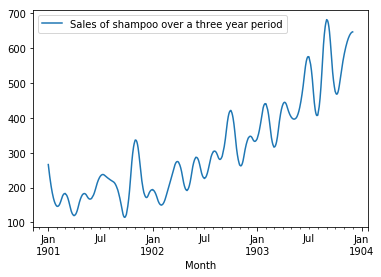

In [43]:
interpolated = unsampled.interpolate(method='spline', order=2)
interpolated.plot()

In [44]:
interpolated.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746


### downsample

- mean

In [45]:
resample = df.resample('Q')
quarterly_mean_sales = resample.mean()

In [46]:
quarterly_mean_sales.head()

,Sales of shampoo over a three year period
Month,
1901-03-31,198.333333
1901-06-30,156.033333
1901-09-30,216.366667
1901-12-31,215.100000
1902-03-31,184.633333


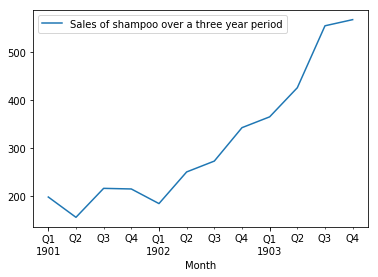

In [47]:
quarterly_mean_sales.plot()

In [48]:
resample = df.resample('A')
yearly_mean_sales = resample.mean()

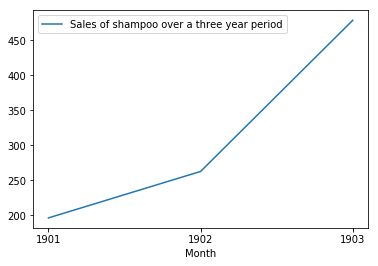

In [49]:
yearly_mean_sales.plot()

# 2. Power Transform

### Dataset: AirPassenger

In [95]:
df = pd.read_csv('./AirPassengers.csv')

In [96]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [97]:
df.index = pd.to_datetime(df['Month'])
del df['Month']

In [98]:
plt.figure(1)

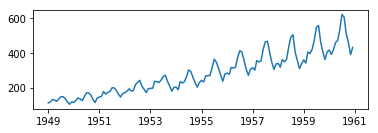

In [57]:
plt.subplot(211)
plt.plot(df)

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <a list of 10 Patch objects>)

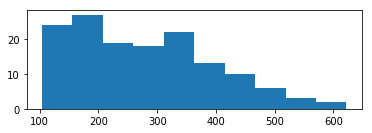

In [65]:
plt.subplot(211)
plt.hist(df['#Passengers'])

### 1) Square root

- 데이터가 quadratic growth를 보일 때 적용

In [66]:
series = [i**2 for i in range(1, 100)]

(array([31., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([1.000e+00, 9.810e+02, 1.961e+03, 2.941e+03, 3.921e+03, 4.901e+03,
        5.881e+03, 6.861e+03, 7.841e+03, 8.821e+03, 9.801e+03]),
 <a list of 10 Patch objects>)

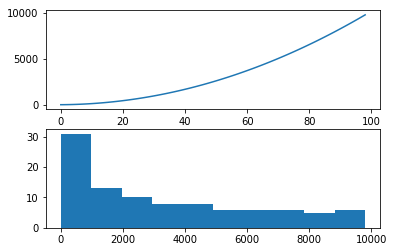

In [67]:
plt.subplot(211)
plt.plot(series)

plt.subplot(212)
plt.hist(series)

In [68]:
from numpy import sqrt

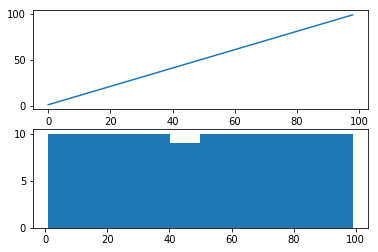

In [69]:
transform = series = sqrt(series)

plt.figure(1)
plt.subplot(211)
plt.plot(transform)

plt.subplot(212)
plt.hist(transform)
plt.show()

In [71]:
df['#Passengers'] = sqrt(df['#Passengers'])

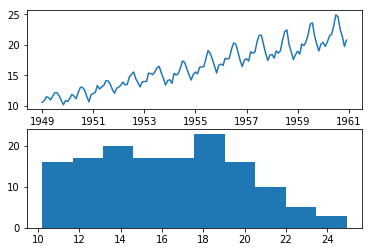

In [72]:
plt.subplot(211)
plt.plot(df['#Passengers'])

plt.subplot(212)
plt.hist(df['#Passengers'])
plt.show()

### 2) Log Transform

In [73]:
from numpy import exp

In [76]:
series = [exp(i) for i in range(100)]

(array([97.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000000e+00, 9.88903032e+41, 1.97780606e+42, 2.96670910e+42,
        3.95561213e+42, 4.94451516e+42, 5.93341819e+42, 6.92232122e+42,
        7.91122426e+42, 8.90012729e+42, 9.88903032e+42]),
 <a list of 10 Patch objects>)

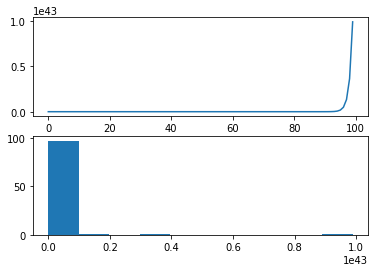

In [77]:
plt.subplot(211)
plt.plot(series)

plt.subplot(212)
plt.hist(series)

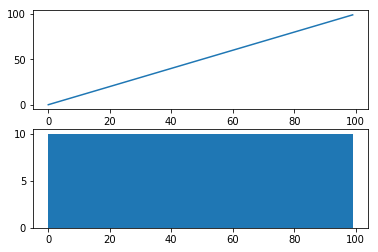

In [78]:
transform = np.log(series)
plt.figure(1)

plt.subplot(211)
plt.plot(transform)

plt.subplot(212)
plt.hist(transform)
plt.show()

In [104]:
df.columns = ['passengers']

In [105]:
df['passengers'] = np.log(df['passengers'])

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <a list of 10 Patch objects>)

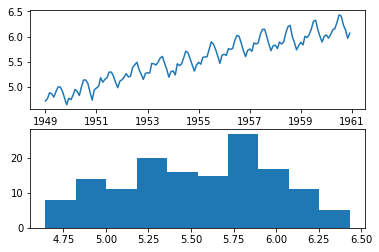

In [106]:
plt.figure(1)

plt.subplot(211)
plt.plot(df['passengers'])

plt.subplot(212)
plt.hist(df['passengers'])

### 3) Boxcox Transform

In [107]:
from scipy.stats import boxcox

In [108]:
df['passengers'] = boxcox(df['passengers'], lmbda = 0.0)

(array([ 8., 10., 10., 18., 18., 16., 18., 25., 15.,  6.]),
 array([1.53566023, 1.56823738, 1.60081452, 1.63339167, 1.66596881,
        1.69854596, 1.7311231 , 1.76370025, 1.79627739, 1.82885454,
        1.86143168]),
 <a list of 10 Patch objects>)

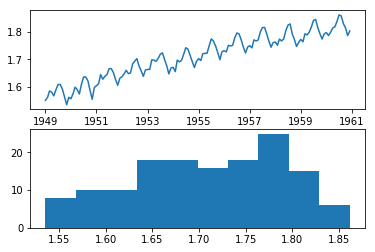

In [109]:
plt.figure(1)

plt.subplot(211)
plt.plot(df['passengers'])

plt.subplot(212)
plt.hist(df['passengers'])

In [123]:
df = pd.read_csv('./AirPassengers.csv')

In [124]:
df.index = pd.to_datetime(df['Month'])
del df['Month']

In [125]:
df['#Passengers'], lam = boxcox(df['#Passengers'])

In [126]:
df.head()

,#Passengers
Month,
1949-01-01,6.827489
1949-02-01,6.932821
1949-03-01,7.161890
1949-04-01,7.114609
1949-05-01,6.983785


(array([10., 14., 16., 14., 20., 21., 18., 16., 10.,  5.]),
 array([ 6.67929963,  7.08651458,  7.49372953,  7.90094447,  8.30815942,
         8.71537437,  9.12258931,  9.52980426,  9.93701921, 10.34423415,
        10.7514491 ]),
 <a list of 10 Patch objects>)

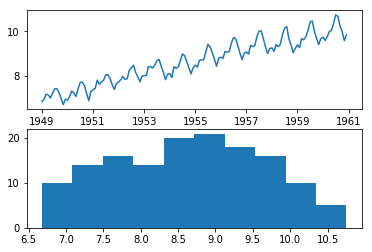

In [127]:
plt.figure(1)

plt.subplot(211)
plt.plot(df['#Passengers'])

plt.subplot(212)
plt.hist(df['#Passengers'])

In [128]:
print(lam)

0.14802256545004658


# 3. Moving Average Smoothing

### Dataset: daily-total-female-birth

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./daily-total-female-births-in-cal.csv')

In [4]:
df = df[:-1]

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.index = df['Date']

In [7]:
df.head()

,Date,"Daily total female births in California, 1959"
Date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [8]:
del df['Date']

In [9]:
df.columns = ['count']

### 1) Moving Average for data preparation

In [10]:
# 3일씩 rolling
rolling = df.rolling(window=3)

In [11]:
rolling_mean = rolling.mean()

In [12]:
rolling_mean.head()

,count
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000


In [13]:
df[:100].plot(color='b')
rolling_mean[:100].plot(color='r')

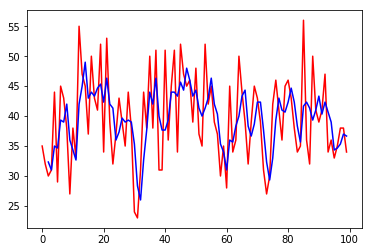

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['count'][:100], color='r')
ax.plot(rolling_mean['count'][:100], color='b')
plt.show()

### 2) Moving average as feature engineering

In [19]:
width = 3

lag1 = df.shift(1)
lag3 = df.shift(width -1)
window = lag3.rolling(window=width)
means = window.mean()

In [20]:
df = pd.concat([means, lag1, df], axis=1)
df.columns = ['mean', 't', 't+1']
df.head()

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44


### 3. Moving Average as Prediction

In [60]:
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error

In [41]:
df.head()

,count
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [57]:
X = df.values
window = 3
history = [X[i] for i in range(window)]

#test
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [58]:
len(history), len(test)

(3, 362)

In [59]:
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length - window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

In [61]:
rmse = sqrt(mean_squared_error(test, predictions))

In [62]:
print("Test RMSE: %.3f" % rmse)

Test RMSE: 7.834


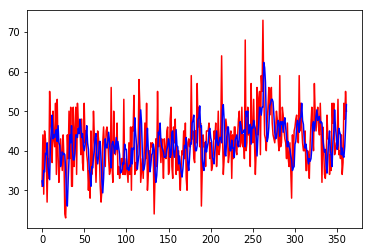

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(test, color='r')
ax.plot(predictions, color='b')
plt.show()